# Stock & Portfolio Analysis

Using Alpha Vantage API to pull real-time stock info

For each stock, compute and visualize:
1. Return, monthly and annualized
2. Volatility, month and annualized
3. Max drawdown
4. VaR & CVaR at 95% confidence level

In [2]:
import pandas as pd
import kit as kit
import matplotlib.pyplot as plt
import numpy as np
from alpha_vantage.timeseries import TimeSeries
import yfinance as yf

from datetime import datetime

key = 'LU0LA7RMZ6XIO00P'

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
# portfolio
p = ['AAL', 'AAPL', 'BAC', 'BND', 'DAL', 'GS', 'INTC', 'UNH', 'XOM']

# cost-basis
cb = [14.50, 250.04, 20.69, 82.32, 35.49, 152.22, 48.81, 225.50, 34.77]

# quantity
q = [2, 1, 2, 1, 1, 1, 1,1, 1]

In [324]:
# pulling data using Alpha Vantage
ts = TimeSeries(key, output_format='pandas')
data = {}
r0 = ts.get_monthly_adjusted(symbol=p[0])[0]
data[p[0]] = r0['5. adjusted close']
dates = r0.index

for i in range(1, len(p)):
    r = ts.get_monthly_adjusted(symbol=p[i])[0]
    n = r['5. adjusted close']
    data[p[i]] = n

prices = pd.DataFrame(data=data, index=dates)
prices.head()

ValueError: Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.

In [140]:
prices.head()

,GS,AAPL,AXP,BAC,MSFT,UNH,JPM,INTC
Date,,,,,,,,
1999-05,53.884857,1.366002,26.024323,15.254425,25.884752,6.127341,25.823458,17.300385
1999-06,57.305325,1.435755,27.972456,17.288345,28.932383,6.580487,30.863255,19.049686
1999-07,51.009659,1.726393,28.494200,15.877847,27.528864,6.409736,27.495981,22.091236
1999-08,47.440479,2.022845,29.737785,14.472472,29.694281,6.390033,30.073553,26.313375
1999-09,48.486591,1.962780,29.197115,13.321251,29.052683,5.115969,27.086420,23.801895


In [167]:
t = yf.download(tickers='aapl', period='10y', interval='3mo').dropna()['Adj Close']
t

[*********************100%***********************]  1 of 1 completed


Date
2010-05-01     31.900509
2010-08-01     37.323280
2010-11-01     42.077667
2011-02-01     43.418163
2011-05-01     48.421799
2011-08-01     50.195084
2011-11-01     56.606174
2012-02-01     72.416931
2012-05-01     75.737808
2012-08-01     73.823158
2012-11-01     56.725925
2013-02-01     55.394901
2013-05-01     56.944649
2013-08-01     66.209930
2013-11-01     63.829231
2014-02-01     75.678955
2014-05-01     86.338547
2014-08-01     98.082008
2014-11-01    106.930092
2015-02-01    114.717735
2015-05-01    111.627487
2015-08-01    110.430367
2015-11-01     90.359383
2016-02-01     87.390038
2016-05-01     97.677963
2016-08-01    107.071121
2016-11-01    115.056038
2017-02-01    136.898727
2017-05-01    142.354492
2017-08-01    162.461700
2017-11-01    161.546280
2018-02-01    160.025726
2018-05-01    185.014206
2018-08-01    213.612686
2018-11-01    163.019196
2019-02-01    197.231476
2019-05-01    210.287552
2019-08-01    246.491638
2019-11-01    307.852936
2020-02-01    287.04

In [209]:
t1 = pd.DataFrame(columns=['AAPL'])
t1['AAPL'] = t.values

In [7]:
# pull data using yfinance bc of Alpha Vantage limits

prices = pd.DataFrame(columns=p)

for i in range(len(p)):
    prices[p[i]] = yf.download(tickers=p[i], period='10y', interval='3mo').dropna()['Adj Close']
    
prices.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAL,AAPL,BAC,BND,DAL,GS,INTC,UNH,XOM
Date,,,,,,,,,
2010-05-01,10.228744,31.900509,12.544461,61.338009,10.553022,130.780090,15.167286,25.994186,42.862976
2010-08-01,11.114922,37.323280,10.236974,62.524616,12.338504,140.069565,14.866451,30.903881,48.078320
2010-11-01,9.351994,42.077667,12.285292,61.244785,10.366478,142.591217,16.033304,35.319912,58.756428
2011-02-01,8.569520,43.418163,10.997910,62.507927,9.220567,131.891693,17.431356,42.497681,64.476219
2011-05-01,5.882706,48.421799,8.702476,64.040985,7.008699,118.132812,16.956264,42.966274,58.782333


In [8]:
# df of monthly stock return
mon_r = kit.rets_fr_prices(prices) 

# construct df of cumulative annualized return from monthly return
y = pd.to_datetime(np.arange(2010,2021,1), format='%Y').to_period('Y')
ann_r = pd.DataFrame(columns=mon_r.columns, index=y, dtype='float') 

for i in range(len(y)):
    ann_r.loc[str(y[i])] = ( 1+mon_r[str(y[i])] ).prod()-1

# covariance matrix
cov = mon_r.cov() 

In [9]:
ann_r

,AAL,AAPL,BAC,BND,DAL,GS,INTC,UNH,XOM
2010,-0.085833,0.318590,-0.020800,-0.001380,-0.018040,0.090278,0.056440,0.359027,0.371084
2011,-0.149634,0.345992,-0.479179,0.086633,-0.096642,-0.311189,0.273831,0.277665,0.062229
2012,0.692184,0.001770,0.596291,0.025932,0.315813,0.347821,-0.177589,0.081752,0.100409
2013,1.347606,0.126016,0.486022,-0.003585,1.212130,0.126499,0.214029,0.335831,0.051225
2014,0.470170,0.675619,-0.090922,0.066448,0.559005,0.063999,0.393188,0.494246,-0.025057
2015,-0.199501,-0.155378,-0.055423,-0.004079,-0.054752,-0.050755,-0.032531,0.099781,-0.080287
2016,0.147350,0.273759,0.626583,0.016249,0.081383,0.442205,0.225233,0.431168,0.114729
2017,0.239152,0.403629,0.435195,0.025099,0.225225,0.183121,0.345777,0.484792,0.079931
2018,-0.335830,0.009574,-0.095526,0.024561,-0.107035,-0.250983,0.002770,0.157217,-0.127052
2019,-0.240980,0.888133,0.179460,0.098364,0.166374,0.223108,0.392509,0.023325,-0.112533


In [192]:
ann_r.index

PeriodIndex(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
             '2018', '2019', '2020'],
            dtype='period[A-DEC]', freq='A-DEC')

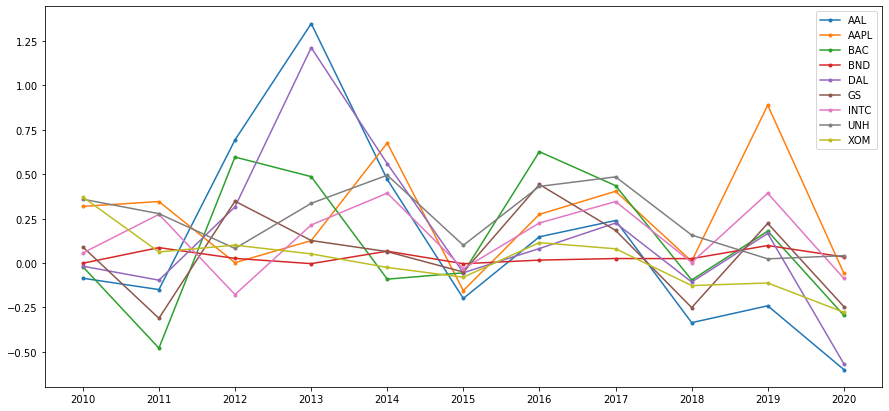

In [10]:
# line chart of time series of each stock return in past 10 years
plt.figure(figsize=(15,7))

for i in range(len(p)):
    plt.plot(ann_r.index.to_timestamp(), ann_r[p[i]], label=p[i], marker='.')

plt.legend()
plt.show()

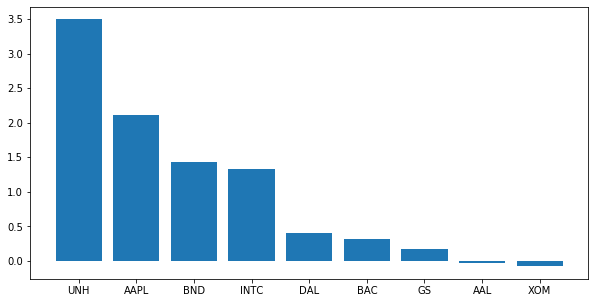

In [11]:
# Sharpe Ratios of each stock
ratios = kit.sharpe_ratio(mon_r, 0.03, 12).sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.bar(ratios.index, ratios.values)
plt.show()

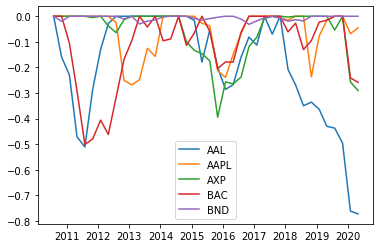

In [208]:
# Max Drawdowns of each stock
plt.figure()

for i in range(5):
    dd = kit.drawdown(mon_r[p[i]])['Drawdowns']
    plt.plot(dd, label=p[i])

plt.legend()
plt.show()

## Semidev, VaR, CVaR

### Interpreting VaR
"Let's say we have a $10 million portfolio, which has a 4.3% VaR at a 5% probability level for one month. What does that value at risk number mean?

What we're saying is that over the next month there's a 5% probability that the portfolio could lose more than 4.3% of its value. Put differently, we are also saying that there's a 95% chance that the portfolio will lose less than 4.3%." 
source: https://gostudy.io/blog/understanding-and-interpreting-var

In [7]:
kit.var_gaussian(rets).sort_values(ascending=False)

BAC     0.181605
AAPL    0.163022
INTC    0.150126
GS      0.144853
AXP     0.140502
JPM     0.136062
MSFT    0.128136
UNH     0.098755
dtype: float64

# **Portfolio Analysis**

Given weights, calculate:
1. Return
2. Volatility and covariance matrix
3. Sharpe Ratio
4. Max drawdown

Test out portfolio ideas:
1. Max Sharpe
2. Global Minimum Variance
3. Equal Weight
4. Industry-skewed
5. Value and small-cap

## Given weights, calculate portfolio effectiveness

In [13]:
# calculate portfolio distribution, capitalization and weights based on cost basis and quantity
p_dist = prices.tail(1) * q
p_cap = p_dist.sum(axis=1)
p_weights = (p_dist / p_cap[0]).iloc[0]

In [14]:
# calculate portfolio return and volatility
ann_r_s = kit.ann_rets(mon_r, 4) # ann_r_s = annualized return of each stock, single value
p_ret = kit.portfolio_return(p_weights, ann_r_s)
p_vol = kit.portfolio_vol(p_weights, cov)

In [15]:
p_ret

0.1602050395729433

In [16]:
p_vol

0.05839048488267488

In [17]:
cov

,AAL,AAPL,BAC,BND,DAL,GS,INTC,UNH,XOM
AAL,0.036577,0.000932,0.012321,-0.000471,0.023724,0.007948,0.003050,0.001237,0.005759
AAPL,0.000932,0.013694,-0.000515,0.000165,0.001191,0.001774,0.003947,0.000836,0.002218
BAC,0.012321,-0.000515,0.021188,-0.001358,0.009611,0.013202,0.000637,0.003369,0.003999
BND,-0.000471,0.000165,-0.001358,0.000252,-0.000792,-0.000956,0.000084,-0.000201,-0.000358
DAL,0.023724,0.001191,0.009611,-0.000792,0.027776,0.009310,0.002900,0.000046,0.005242
GS,0.007948,0.001774,0.013202,-0.000956,0.009310,0.012122,0.000313,0.002979,0.003016
INTC,0.003050,0.003947,0.000637,0.000084,0.002900,0.000313,0.009141,0.000096,0.001432
UNH,0.001237,0.000836,0.003369,-0.000201,0.000046,0.002979,0.000096,0.006193,0.001780
XOM,0.005759,0.002218,0.003999,-0.000358,0.005242,0.003016,0.001432,0.001780,0.006975


In [19]:
ax = kit.plot_ef(25, ann_r_s, cov, riskfree_rate=0.02, show_ew=True, show_gmv=True, portfolio=p)
plt.figure(figsize=(10,5))

TypeError: plot_ef() got an unexpected keyword argument 'portfolio'

In [20]:
# minimal volatility weights to yield same current return
mv_weights = kit.minimize_vol(p_ret, ann_r_s, cov, p)
mv_weights

,w
AAL,0.000000
AAPL,0.120452
BAC,0.000000
BND,0.386440
DAL,0.019102
GS,0.000000
INTC,0.065036
UNH,0.408970
XOM,0.000000


In [21]:
# max Sharpe Ratio
msr_weights = kit.msr(0.02,ann_r_s,cov,p)
msr_weights

,w
AAL,0.000000
AAPL,0.065867
BAC,0.000000
BND,0.613641
DAL,0.024767
GS,0.000000
INTC,0.038202
UNH,0.257523
XOM,0.000000


In [22]:
# Global Minimum Var portfolio
gmv_weights = kit.gmv(cov, p)
gmv_weights

,w
AAL,0.000000
AAPL,0.000000
BAC,0.037084
BND,0.895276
DAL,0.001972
GS,0.031134
INTC,0.000000
UNH,0.007687
XOM,0.026847
